In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'lipids.csv', skiprows=4)
df = df[df.diseased == 1]
df.describe()

,diseased,chol,trig
count,320.0,320.000000,320.000000
mean,1.0,216.190625,179.353125
std,0.0,43.014519,101.846419
min,1.0,105.000000,36.000000
25%,1.0,185.000000,115.000000
50%,1.0,212.500000,150.000000
75%,1.0,242.000000,218.500000
max,1.0,417.000000,930.000000


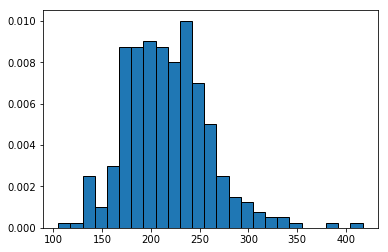

In [3]:
plt.figure()
n, bins, _ = plt.hist(df.chol, bins=25, edgecolor='k', normed=True)
plt.show()

In [4]:
bin_mean = np.array([.5*(bins[i+1] + bins[i]) for i in range(len(bins)-1)])
bin_mean[n == n.max()][0]

236.04000000000002

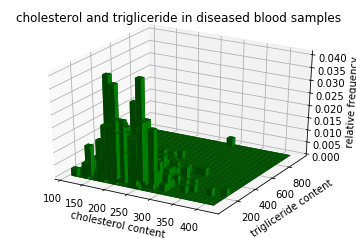

In [10]:
from mpl_toolkits.mplot3d import Axes3D

'''
--------------------------------------------------------------------
bin_num  = integer > 2, number of bins along each axis
hist     = (bin_num, bin_num) matrix, bin percentages
xedges   = (bin_num+1,) vector, bin edge values in x-dimension
yedges   = (bin_num+1,) vector, bin edge values in y-dimension
x_midp   = (bin_num,) vector, midpoints of bins in x-dimension
y_midp   = (bin_num,) vector, midpoints of bins in y-dimension
elements = integer, total number of 3D histogram bins
xpos     = (bin_num * bin_num) vector, x-coordinates of each bin
ypos     = (bin_num * bin_num) vector, y-coordinates of each bin
zpos     = (bin_num * bin_num) vector, zeros or z-coordinates of
            origin of each bin
dx       = (bin_num,) vector, x-width of each bin
dy       = (bin_num,) vector, y-width of each bin
dz       = (bin_num * bin_num) vector, height of each bin
--------------------------------------------------------------------
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = int(25)
hist, xedges, yedges = np.histogram2d(df.chol, df.trig, bins=bin_num)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel('cholesterol content')
ax.set_ylabel('trigliceride content')
ax.set_zlabel('relative frequency')
plt.title('cholesterol and trigliceride in diseased blood samples')
plt.show()

The 2D histogram, does not reveal any striking concentration of cholsterol content at any of the tails. In contrast, the mean of the class withh the highest relative frequency is relatively close to the sample mean. The 3D histogram revelas that most of the blood samples that are diseased have a rather low evel of trigliceride.